**Exploratory Data Analysis Part 1**


Import Pandas, Matplotlib and MySQL Connector

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection


SQL Query

In [2]:
myremotedb = connection.connect(host="devcodecamp-mysql.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com",
                                database="salesdb", user="root", password="D3v$tudent", use_pure="True")
select_query = "SELECT * FROM salesdb.sales JOIN salesdb.cities USING (City_ID);"

remotedf = pd.read_sql_query(select_query, myremotedb, index_col="City_ID")

remotedf.head()


c:\Users\Nae\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City
City_ID,,,,,,,,,,,,,,,
1,101-17-6199,Normal,Male,Food and beverages,45.79,7,None,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0,Seattle
3,101-81-4070,Member,Female,Health and beauty,62.82,2,None,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9,Milwaukee
3,102-06-2002,Member,Male,Sports and travel,25.25,5,None,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1,Milwaukee
3,102-77-2261,Member,Male,Health and beauty,65.31,7,None,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2,Milwaukee
1,105-10-6182,Member,Male,Fashion accessories,21.48,2,None,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6,Seattle


Check Null items

In [3]:
nonnull_remotedf = remotedf.dropna()
nonnull_remotedf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     0 non-null      object 
 1   Customer_Type  0 non-null      object 
 2   Gender         0 non-null      object 
 3   Product_Line   0 non-null      object 
 4   Unit_Price     0 non-null      float64
 5   Quantity       0 non-null      int64  
 6   Sales_Tax      0 non-null      object 
 7   Total          0 non-null      float64
 8   Date           0 non-null      object 
 9   Time           0 non-null      object 
 10  Payment        0 non-null      object 
 11  COGS           0 non-null      float64
 12  Gross_Income   0 non-null      float64
 13  Rating         0 non-null      float64
 14  City           0 non-null      object 
dtypes: float64(5), int64(1), object(9)
memory usage: 0.0+ bytes


Check for duplicates

In [4]:
nonnull_remotedf.duplicated().sort_values()
nonnull_remotedf[nonnull_remotedf.duplicated()]


,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City
City_ID,,,,,,,,,,,,,,,


Convert to Pandas datetime

In [5]:
remotedf["Date"] = pd.to_datetime(remotedf["Date"])
remotedf["Time"] = pd.to_datetime(remotedf["Time"])
remotedf.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice_ID     1000 non-null   object        
 1   Customer_Type  1000 non-null   object        
 2   Gender         1000 non-null   object        
 3   Product_Line   1000 non-null   object        
 4   Unit_Price     1000 non-null   float64       
 5   Quantity       1000 non-null   int64         
 6   Sales_Tax      0 non-null      object        
 7   Total          1000 non-null   float64       
 8   Date           1000 non-null   datetime64[ns]
 9   Time           1000 non-null   datetime64[ns]
 10  Payment        1000 non-null   object        
 11  COGS           1000 non-null   float64       
 12  Gross_Income   1000 non-null   float64       
 13  Rating         1000 non-null   float64       
 14  City           1000 non-null   object        
dtypes: datetime64[ns](2), fl

Sales made for members vs normal customers

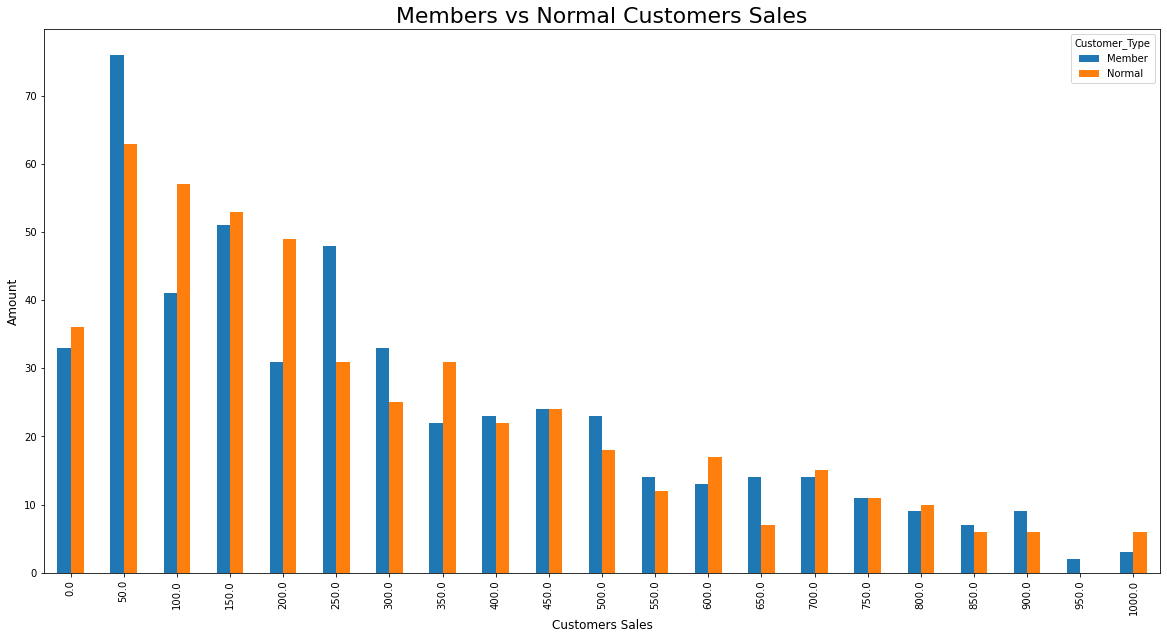

In [7]:
customers_data = remotedf[(remotedf["Customer_Type"] == "Member") | (remotedf["Customer_Type"] == "Normal")]
remotedf["Rounded Total"] = (remotedf["Total"] // 50) * 50
customers_data.groupby(["Rounded Total", "Customer_Type"]).size().unstack().plot(kind="bar", figsize=(20,10));

plt.title("Members vs Normal Customers Sales", fontsize=22);

plt.xlabel("Customers Sales", fontsize=12);

plt.ylabel("Amount", fontsize=12);



Sales made at each store location

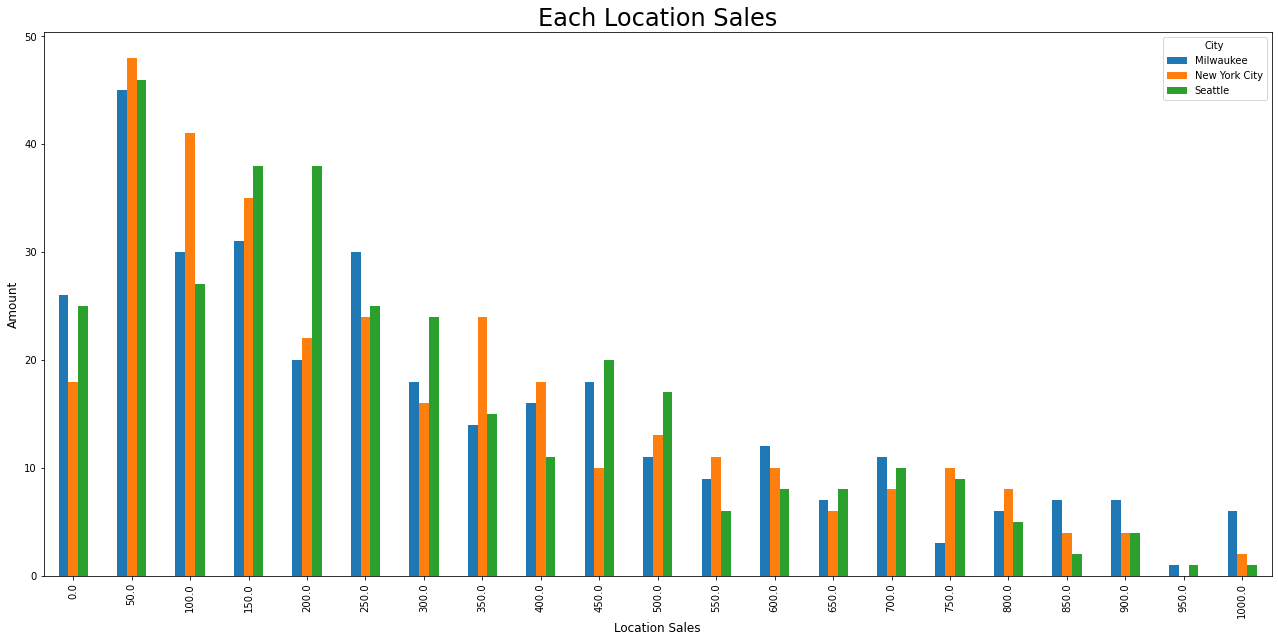

In [8]:
location_data = remotedf[(remotedf["City"] == "Seattle") | (remotedf["City"] == "New York City") | (remotedf["City"] == "Milwaukee")]
location_data.groupby(["Rounded Total", "City"]).size().unstack().plot(kind="bar", figsize=(22,10));

plt.title("Each Location Sales", fontsize=24);

plt.xlabel("Location Sales", fontsize=12);

plt.ylabel("Amount", fontsize=12);


Sales made for each product line

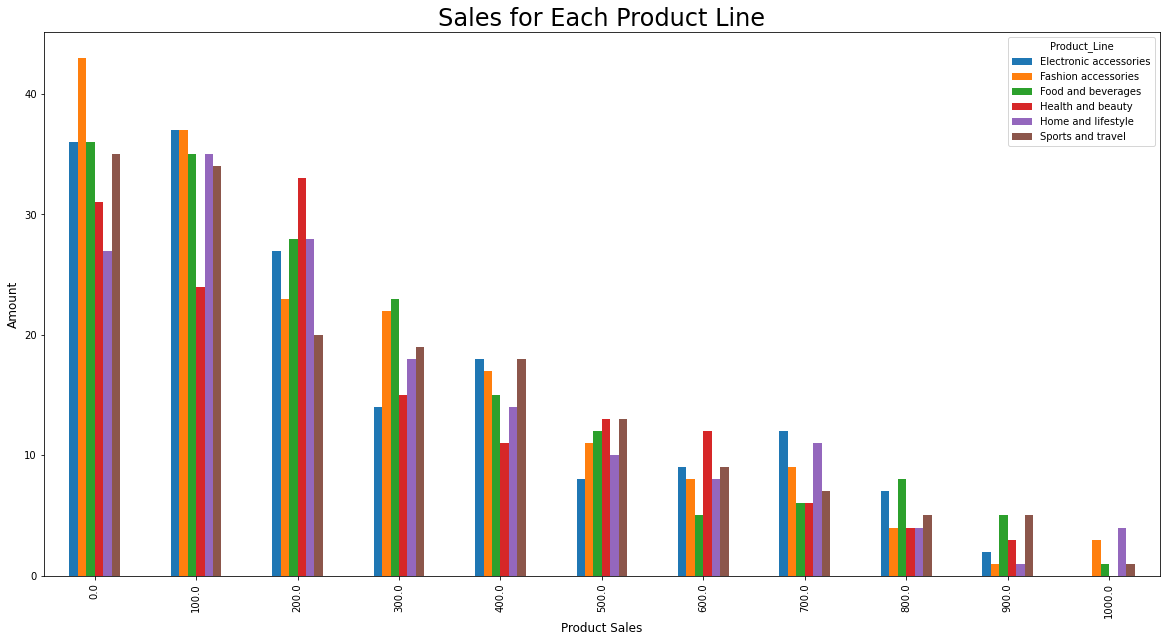

In [10]:
product_data = remotedf[(remotedf["Product_Line"] == "Fashion accessories") | (remotedf["Product_Line"] == "Food and beverages") |
(remotedf["Product_Line"] == "Electronic accessories") | (remotedf["Product_Line"] == "Sports and travel") | (remotedf["Product_Line"] == "Home and lifestyle") | (remotedf["Product_Line"] == "Health and beauty")]

remotedf["Total by Hundreds"] = (remotedf["Total"] // 100) * 100

product_data.groupby(["Total by Hundreds", "Product_Line"]).size().unstack().plot(kind="bar", figsize=(20,10));

plt.title("Sales for Each Product Line", fontsize=24);

plt.xlabel("Product Sales", fontsize=12);

plt.ylabel("Amount", fontsize=12);


What is the overall average rating, based on sales records?

In [12]:
remotedf["Rating"].mean()


6.972699999999995